In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

IMAGE_SIZE = 256 
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [2]:
data_dir = "PlantVillage"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
)


Found 8718 files belonging to 8 classes.


In [3]:
image_count = len(dataset)
image_count


273

In [4]:
class_names = dataset.class_names
print("Class names:", class_names)


Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [5]:
for image_batch, labels_batch in dataset:
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 2 5 5 7 7 2 7 5 7 5 1 7 7 5 5 3 2 7 7 3 2 3 0 3 6 0 1 3 5 3]
(32, 256, 256, 3)
[2 6 5 6 2 2 7 5 1 2 7 0 0 5 7 5 0 5 5 5 3 7 3 2 5 3 3 1 7 5 3 7]
(32, 256, 256, 3)
[1 1 3 1 5 1 1 5 2 5 0 6 5 5 2 0 0 2 1 5 1 5 0 6 0 5 7 5 7 2 7 3]
(32, 256, 256, 3)
[3 3 7 1 5 0 5 0 1 1 5 3 7 3 5 0 1 0 7 5 6 6 0 7 2 2 5 7 3 3 5 3]
(32, 256, 256, 3)
[5 7 1 2 7 7 7 1 7 6 1 0 5 7 5 3 6 3 3 1 1 7 5 1 1 7 0 7 2 3 6 2]
(32, 256, 256, 3)
[7 5 3 1 2 7 4 4 5 7 3 7 6 1 3 1 2 1 7 5 6 2 5 6 7 0 0 3 5 5 7 2]
(32, 256, 256, 3)
[5 0 1 0 3 2 5 1 1 5 2 6 1 5 5 5 6 2 7 3 1 0 2 0 7 5 7 6 2 5 5 3]
(32, 256, 256, 3)
[3 5 5 1 2 3 2 3 1 4 5 0 1 0 0 1 7 1 5 7 5 1 7 7 2 7 6 3 5 1 5 3]
(32, 256, 256, 3)
[3 3 0 2 3 1 6 7 6 7 3 1 3 1 1 7 0 1 3 5 5 1 5 2 0 5 3 6 2 7 5 0]
(32, 256, 256, 3)
[7 7 7 5 5 5 5 5 3 6 2 5 5 3 0 7 1 1 7 2 5 5 7 3 1 5 5 3 5 1 3 1]
(32, 256, 256, 3)
[6 5 3 7 6 2 2 1 7 7 0 0 1 5 0 1 2 0 0 1 5 6 5 7 6 0 7 1 2 7 7 3]
(32, 256, 256, 3)
[5 5 1 1 7 7 3 1 3 7 7 1 5 3 1 0 5 2 5 7 0 1 5 1 5 1 4 1 7

(32, 256, 256, 3)
[7 3 4 7 7 5 5 7 5 2 7 2 5 7 5 6 1 5 1 1 7 0 5 7 2 1 1 1 1 7 7 0]
(32, 256, 256, 3)
[5 6 5 0 5 3 1 2 4 7 1 7 7 0 2 6 5 2 7 1 7 7 5 5 1 1 4 1 1 0 1 0]
(32, 256, 256, 3)
[0 1 0 1 5 5 1 2 2 1 0 3 5 0 7 0 5 1 5 5 5 0 1 3 5 0 3 6 7 5 3 3]
(32, 256, 256, 3)
[0 5 7 7 5 4 3 1 7 1 7 7 2 1 6 1 1 2 1 5 7 0 3 3 5 1 3 6 1 1 5 7]
(32, 256, 256, 3)
[5 1 3 1 2 5 1 7 7 5 0 0 0 1 7 1 5 7 7 5 1 5 2 1 3 0 0 7 1 2 3 5]
(32, 256, 256, 3)
[1 0 5 3 5 6 0 7 0 7 5 5 7 5 2 7 0 3 7 0 7 7 2 5 7 2 6 0 0 5 7 4]
(32, 256, 256, 3)
[5 5 6 1 5 1 1 2 5 5 0 1 1 0 1 1 7 5 5 5 6 0 2 1 1 3 5 3 7 3 0 7]
(32, 256, 256, 3)
[1 7 1 7 3 5 3 7 1 1 7 5 5 5 5 7 2 6 3 6 1 2 7 0 7 5 1 1 3 5 5 6]
(32, 256, 256, 3)
[5 5 1 5 7 1 6 2 3 5 5 5 3 1 7 5 0 5 3 0 2 7 6 5 3 6 2 5 5 3 2 7]
(32, 256, 256, 3)
[5 7 5 1 0 5 7 5 7 3 1 2 2 6 2 2 7 0 0 3 7 3 6 5 5 1 4 1 0 3 7 0]
(32, 256, 256, 3)
[5 3 0 7 1 0 5 7 4 7 6 0 5 2 5 2 1 7 5 5 5 1 1 6 7 7 1 7 1 4 3 1]
(32, 256, 256, 3)
[0 6 5 0 0 4 2 5 7 2 3 3 1 7 7 1 5 1 3 7 5 7 7 7 3 5 6 7 5

(32, 256, 256, 3)
[5 0 0 7 7 5 1 2 2 5 1 5 7 7 2 5 0 0 5 6 3 0 7 7 3 5 7 5 7 7 3 2]
(32, 256, 256, 3)
[7 2 1 0 2 3 2 2 0 5 5 5 3 1 5 5 7 2 2 7 3 7 6 2 3 1 6 1 5 1 5 3]
(32, 256, 256, 3)
[2 3 0 7 2 5 0 5 5 7 0 0 5 2 3 3 3 1 7 1 2 2 0 5 7 1 0 3 2 2 2 5]
(32, 256, 256, 3)
[3 1 5 6 5 7 0 1 1 7 5 2 2 2 3 1 7 5 0 5 4 2 0 1 6 7 7 5 1 7 1 5]
(32, 256, 256, 3)
[7 1 7 7 5 7 0 3 3 3 0 3 7 5 0 3 5 5 5 3 5 1 5 5 2 2 7 3 5 3 1 1]
(32, 256, 256, 3)
[7 7 2 3 3 7 7 2 5 1 5 1 3 3 5 5 1 0 0 5 5 2 1 1 2 7 2 3 5 5 2 1]
(32, 256, 256, 3)
[3 5 2 7 7 5 7 5 5 2 1 2 7 6 7 3 3 0 1 7 5 2 5 2 5 1 5 7 2 3 6 7]
(32, 256, 256, 3)
[3 3 2 1 1 6 5 2 0 3 0 3 1 5 1 7 2 5 5 1 7 6 2 1 5 1 5 2 3 7 7 1]
(32, 256, 256, 3)
[7 3 2 2 7 0 5 7 3 7 7 2 1 0 4 1 6 0 3 6 5 7 7 1 7 5 2 7 7 1 1 5]
(32, 256, 256, 3)
[0 5 1 7 1 1 7 1 3 5 2 7 5 3 1 2 2 1 2 5 0 5 5 3 5 2 5 3 3 3 7 2]
(32, 256, 256, 3)
[1 2 1 5 5 5 4 1 5 0 5 0 0 2 2 0 1 1 3 7 5 5 5 0 7 0 2 1 0 6 5 3]
(32, 256, 256, 3)
[3 5 0 7 7 5 0 1 5 7 7 1 0 5 7 0 1 1 7 5 1 7 5 5 5 5 1 1 0

Image dimensions: 256 x 256 x 3


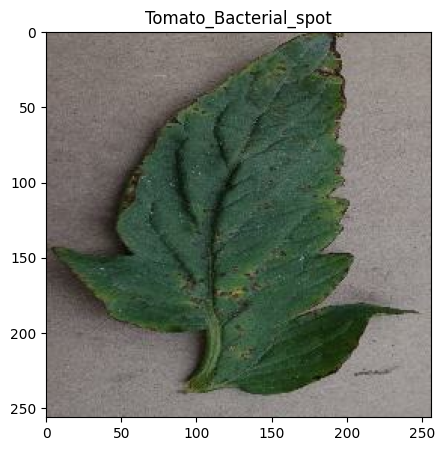

Image dimensions: 256 x 256 x 3


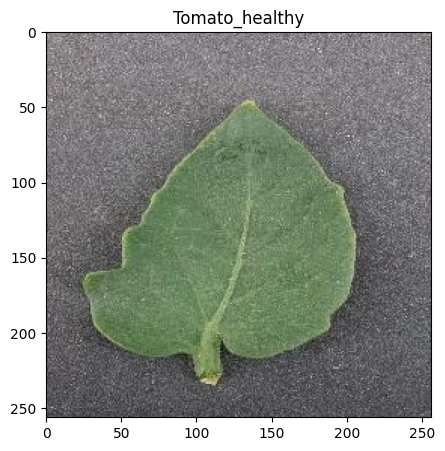

Image dimensions: 256 x 256 x 3


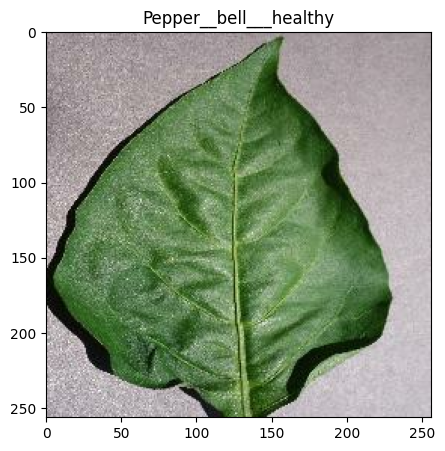

In [6]:
for images, labels in dataset.take(1):
    for i in range(3):
        image = images[i].numpy().astype('uint8')
        label = labels[i].numpy()
        height, width, channels = image.shape
        print("Image dimensions: {} x {} x {}".format(height, width, channels))
        fig, axis = plt.subplots(figsize=(5,5))

        # Plot the image with its coordinates
        axis.imshow(image)
        axis.set_xlim([0, width])
        axis.set_ylim([height, 0])
        axis.set_title(class_names[label])

        # Show the plot
        plt.show()


In [7]:
# Split the dataset into training, validation, and test sets
train_ds = dataset.take(int(len(dataset) * 0.6))
val_ds = dataset.skip(int(len(dataset) * 0.6)).take(int(len(dataset) * 0.2))
test_ds = dataset.skip(int(len(dataset) * 0.8))


In [8]:
train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(1000).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.shuffle(1000).cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [9]:
resize_and_rescale = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.image.resize(x, (IMAGE_SIZE, IMAGE_SIZE))),
  layers.experimental.preprocessing.Rescaling(1./255),
])


In [10]:
# Define data augmentation 
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
# Apply data augmentation to the training set only
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=25
)

Epoch 1/25
163/163 [==============================] - 235s 1s/step - loss: 1.9199 - accuracy: 0.2715 - val_loss: 1.7649 - val_accuracy: 0.3802
Epoch 2/25
163/163 [==============================] - 231s 1s/step - loss: 1.2572 - accuracy: 0.5311 - val_loss: 2.0462 - val_accuracy: 0.4693
Epoch 3/25
163/163 [==============================] - 239s 1s/step - loss: 0.6914 - accuracy: 0.7477 - val_loss: 0.8890 - val_accuracy: 0.7112
Epoch 4/25
163/163 [==============================] - 255s 2s/step - loss: 0.4669 - accuracy: 0.8319 - val_loss: 0.9043 - val_accuracy: 0.7008
Epoch 5/25
163/163 [==============================] - 279s 2s/step - loss: 0.4092 - accuracy: 0.8480 - val_loss: 0.8494 - val_accuracy: 0.7216
Epoch 6/25
163/163 [==============================] - 335s 2s/step - loss: 0.3673 - accuracy: 0.8639 - val_loss: 0.7686 - val_accuracy: 0.7419
Epoch 7/25
163/163 [==============================] - 337s 2s/step - loss: 0.3450 - accuracy: 0.8735 - val_loss: 0.6949 - val_accuracy: 0.7650

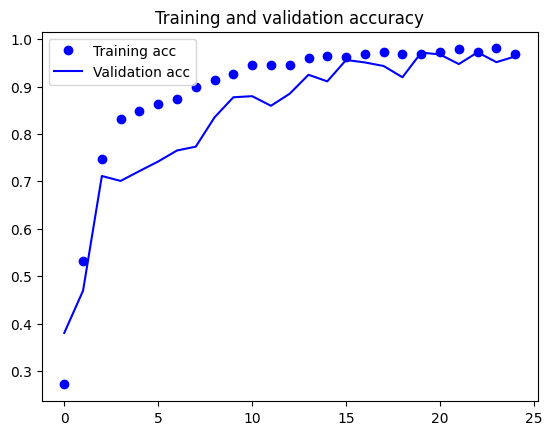

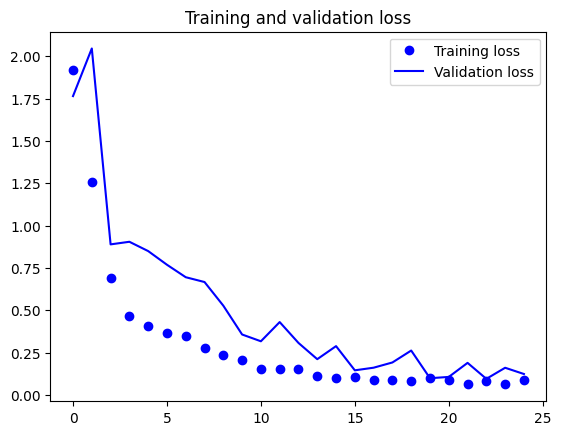

In [16]:
acc = history.history.get('acc', history.history.get('accuracy', None))
val_acc = history.history.get('val_acc', history.history.get('val_accuracy', None))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
import numpy as np

First image to predict
Actual label: Pepper__bell___Bacterial_spot
1/1 [==============================] - 1s 900ms/step
Predicted label: Pepper__bell___Bacterial_spot


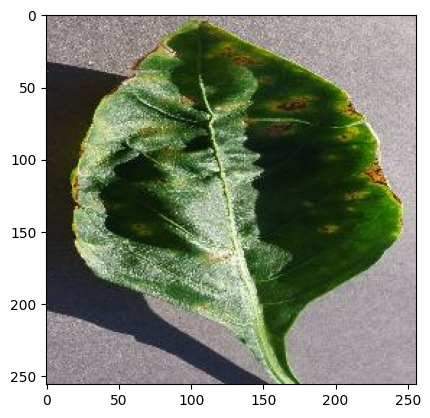

In [18]:
test_batch = next(iter(test_ds))

first_image, first_label = test_batch[0][0], test_batch[1][0]

first_image_np = first_image.numpy().astype('uint8')
plt.imshow(first_image_np)
print("First image to predict")

# Display the actual label for the first image
actual_label = class_names[first_label]
print("Actual label:", actual_label)

# Make a prediction for the entire batch of images
batch_prediction = model.predict(test_batch[0])

# Display the predicted label for the first image
predicted_label = class_names[np.argmax(batch_prediction[0])]
print("Predicted label:", predicted_label)

In [19]:
def predict(model, img):
    img_array = img.numpy().astype('uint8')
    img_array = tf.keras.preprocessing.image.img_to_array(img_array)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [20]:
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 39ms/step


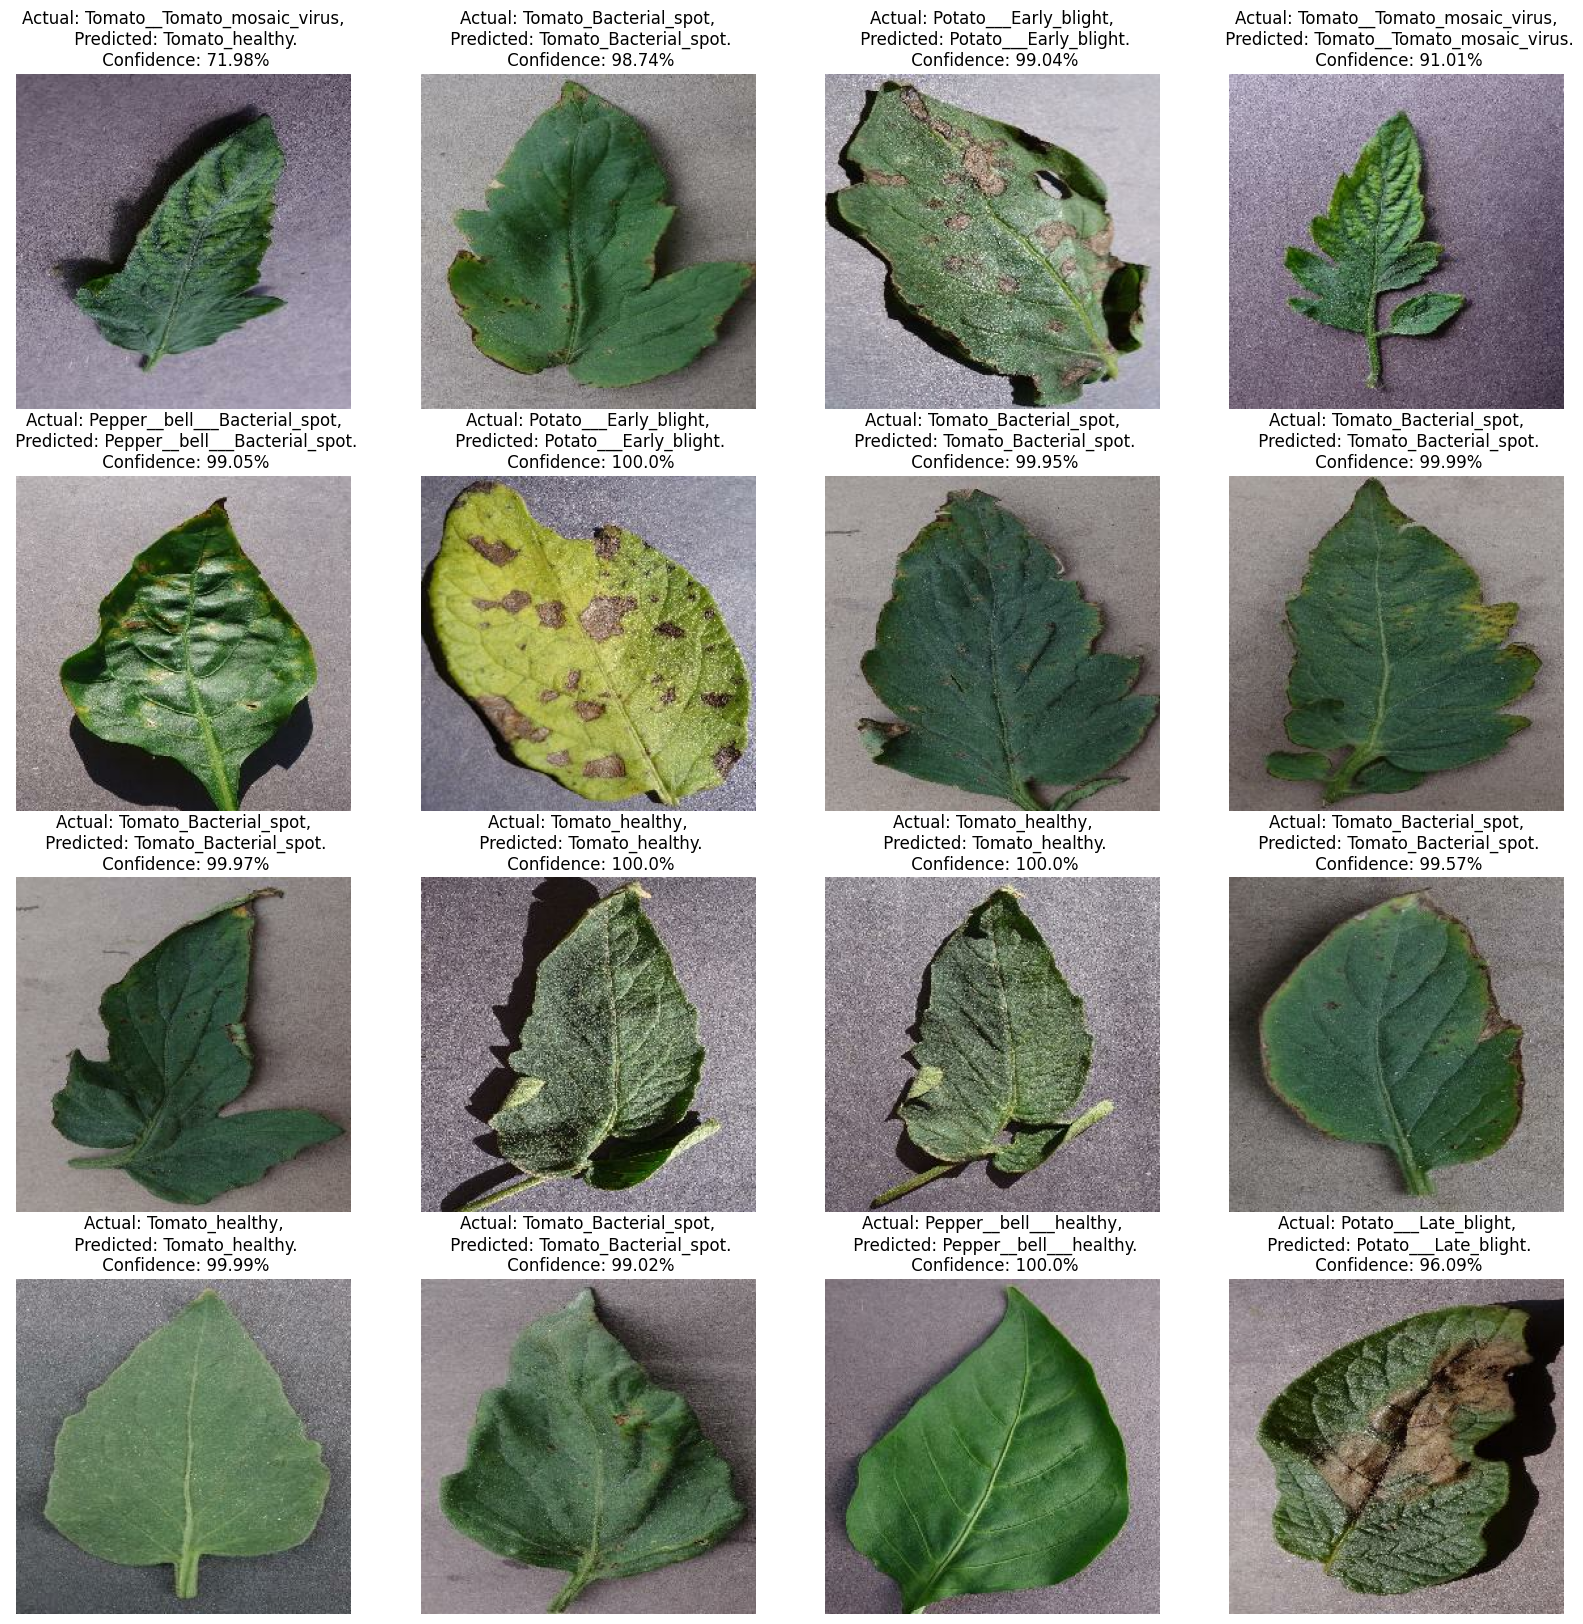

In [21]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


In [22]:
import os

In [23]:
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets


In [24]:
model.save("../plants.h5")